# Feature Engineering

In [1]:
import os
from pathlib import Path

import pandas as pd

from config.config import Config
from src.features import create_features_and_target
from src.plots import plot_correlation_heatmap
from src.utils import set_seed

In [2]:
cfg = Config(Path("../config/config.yaml"))
rng = set_seed(cfg.runtime.seed)

2025-08-24 14:49:04,068 - INFO - src.utils - Global random seed set to 42


In [3]:
df_price_sent = pd.read_csv(Path(cfg.data.processed_dir) / "prices_with_sentiment.csv")
df_price_sent.head()

,date,open,high,low,close,volume,adj_close,pos,neu,neg,...,emb_7,emb_8,emb_9,emb_10,emb_11,emb_12,emb_13,emb_14,emb_15,emb_16
0,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.080308,0.723097,0.196594,...,0.151610,-0.232541,0.348419,0.543224,-0.179494,0.553609,-0.347092,-0.518843,0.684280,0.227482
1,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.168894,0.695768,0.135338,...,0.135462,-0.261237,0.484763,0.363776,-0.225049,0.529768,-0.494232,-0.317024,0.633304,0.377935
2,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0.040929,0.696532,0.262539,...,0.295696,-0.275410,0.380731,0.385763,-0.265997,0.593549,-0.534134,-0.397291,0.669396,0.230531
3,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0.003527,0.833299,0.163175,...,0.166847,-0.208769,0.382932,0.774060,-0.113826,0.511805,-0.298713,-0.347355,0.684939,0.299247
4,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.022426,0.928612,0.048962,...,0.036605,-0.267980,0.408606,0.557198,-0.188280,0.686246,-0.483639,-0.340268,0.713771,0.236775


In [4]:
df_full = create_features_and_target(df_price_sent, forecast_horizon=30)
df_full.head()

,date,open,high,low,close,volume,adj_close,pos,neu,neg,...,target_30,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,quarter,dow
7,2008-08-19,11478.089844,11478.169922,11318.500000,11348.549805,171580000,11348.549805,0.042369,0.942838,0.014793,...,-0.001807,-0.015602,0.003778,0.007168,-0.009451,-0.011943,0.004085,NaN,3,1
8,2008-08-20,11345.940430,11454.150391,11290.580078,11417.429688,144880000,11417.429688,0.043197,0.772239,0.184564,...,-0.032678,-0.011463,-0.015602,0.003778,0.007168,-0.009451,-0.011943,0.004085,3,2
9,2008-08-21,11415.230469,11476.209961,11315.570312,11430.209961,130020000,11430.209961,0.001049,0.777835,0.221116,...,-0.015136,0.006051,-0.011463,-0.015602,0.003778,0.007168,-0.009451,-0.011943,3,3
10,2008-08-22,11426.790039,11632.129883,11426.790039,11628.059570,138790000,11628.059570,0.100609,0.738009,0.161382,...,-0.036480,0.001119,0.006051,-0.011463,-0.015602,0.003778,0.007168,-0.009451,3,4
11,2008-08-25,11626.190430,11626.269531,11362.629883,11386.250000,148610000,11386.250000,0.003025,0.902580,0.094395,...,-0.052416,0.017161,0.001119,0.006051,-0.011463,-0.015602,0.003778,0.007168,3,0


In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 7 to 1988
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1982 non-null   datetime64[ns]
 1   open           1982 non-null   float64       
 2   high           1982 non-null   float64       
 3   low            1982 non-null   float64       
 4   close          1982 non-null   float64       
 5   volume         1982 non-null   int64         
 6   adj_close      1982 non-null   float64       
 7   pos            1982 non-null   float64       
 8   neu            1982 non-null   float64       
 9   neg            1982 non-null   float64       
 10  pos_minus_neg  1982 non-null   float64       
 11  emb_0          1982 non-null   float64       
 12  emb_1          1982 non-null   float64       
 13  emb_2          1982 non-null   float64       
 14  emb_3          1982 non-null   float64       
 15  emb_4          1982 n

In [6]:
df_full

,date,open,high,low,close,volume,adj_close,pos,neu,neg,...,target_30,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,quarter,dow
7,2008-08-19,11478.089844,11478.169922,11318.500000,11348.549805,171580000,11348.549805,0.042369,0.942838,0.014793,...,-0.001807,-0.015602,0.003778,0.007168,-0.009451,-0.011943,0.004085,NaN,3,1
8,2008-08-20,11345.940430,11454.150391,11290.580078,11417.429688,144880000,11417.429688,0.043197,0.772239,0.184564,...,-0.032678,-0.011463,-0.015602,0.003778,0.007168,-0.009451,-0.011943,0.004085,3,2
9,2008-08-21,11415.230469,11476.209961,11315.570312,11430.209961,130020000,11430.209961,0.001049,0.777835,0.221116,...,-0.015136,0.006051,-0.011463,-0.015602,0.003778,0.007168,-0.009451,-0.011943,3,3
10,2008-08-22,11426.790039,11632.129883,11426.790039,11628.059570,138790000,11628.059570,0.100609,0.738009,0.161382,...,-0.036480,0.001119,0.006051,-0.011463,-0.015602,0.003778,0.007168,-0.009451,3,4
11,2008-08-25,11626.190430,11626.269531,11362.629883,11386.250000,148610000,11386.250000,0.003025,0.902580,0.094395,...,-0.052416,0.017161,0.001119,0.006051,-0.011463,-0.015602,0.003778,0.007168,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,0.065429,0.684537,0.250034,...,NaN,-0.034473,0.012866,-0.002746,0.001395,0.007312,-0.003273,0.005254,2,0
1985,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,0.086932,0.714076,0.198991,...,NaN,-0.015084,-0.034473,0.012866,-0.002746,0.001395,0.007312,-0.003273,2,1
1986,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,0.114712,0.673349,0.211939,...,NaN,0.015600,-0.015084,-0.034473,0.012866,-0.002746,0.001395,0.007312,2,2
1987,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,0.040575,0.727080,0.232345,...,NaN,0.016235,0.015600,-0.015084,-0.034473,0.012866,-0.002746,0.001395,2,3


In [7]:
os.makedirs(cfg.data.processed_dir, exist_ok=True)
df_full.to_csv(Path(cfg.data.processed_dir) / "features_full.csv", index=False)

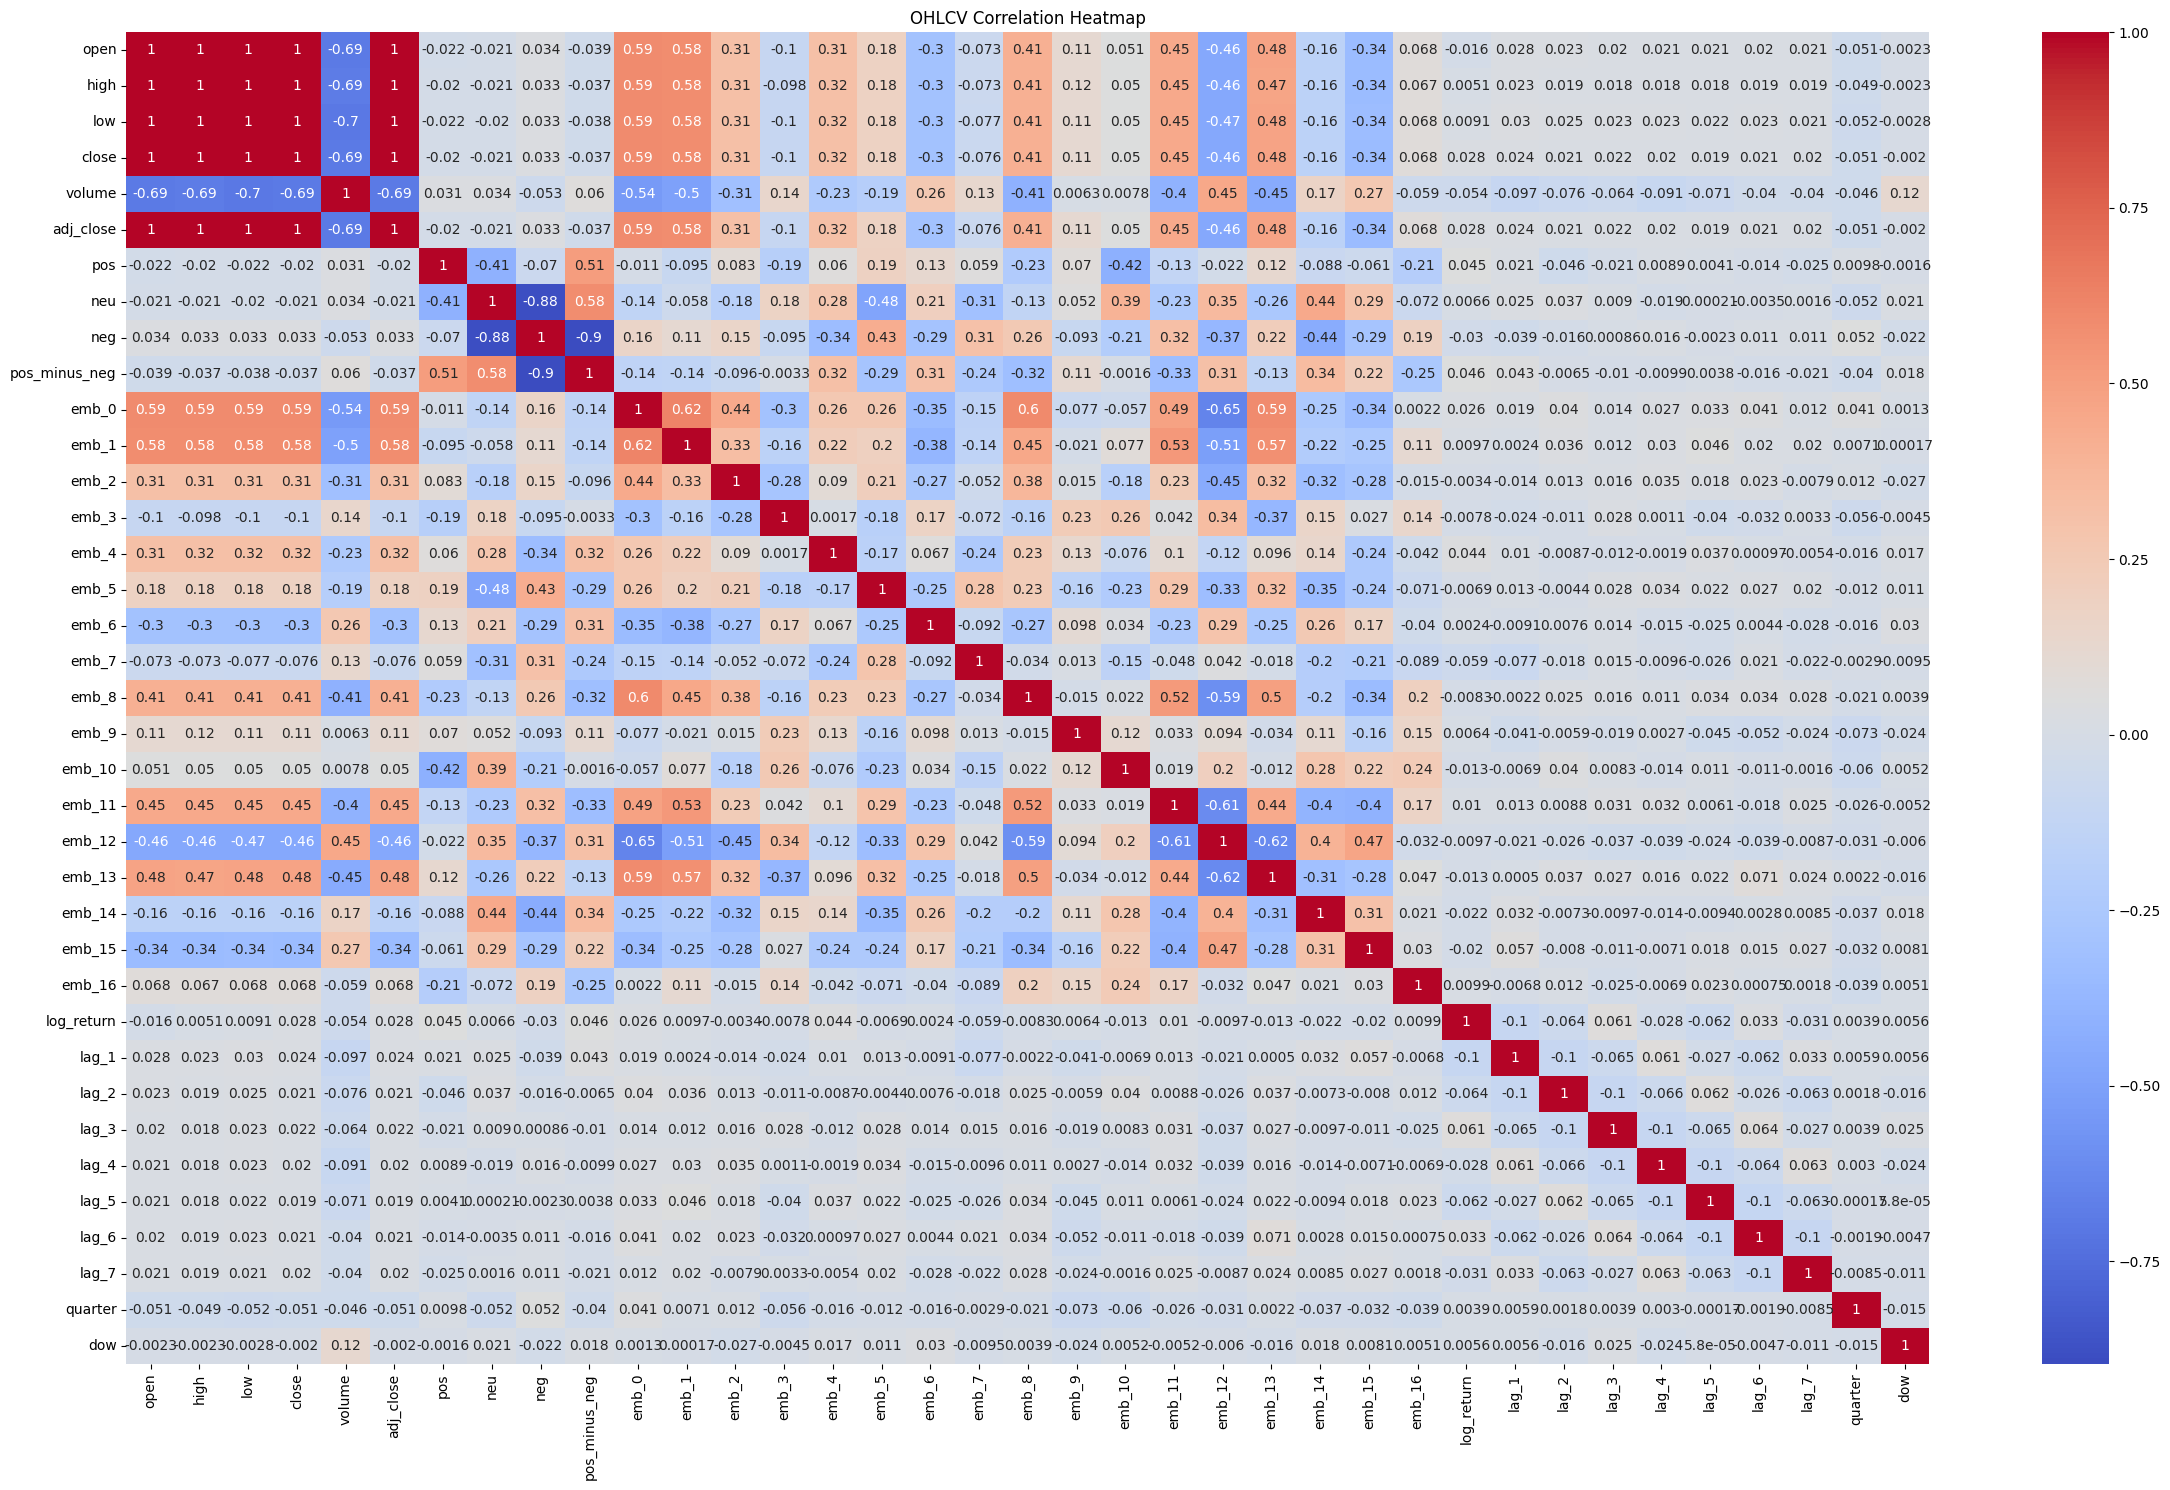

In [8]:
cols = [c for c in df_full.columns if not (c == "target" or c.startswith("target_"))]
plot_correlation_heatmap(df_full, cols, Path(cfg.data.fig_dir) / "full_correlation_heatmap.png", figsize=(24, 15))